# Summary statistics

We will use data about car fuel efficiency for illustrations.

In [1]:
import pandas as pd
import seaborn as sns

cars = sns.load_dataset("mpg")

The `describe` method of a data frame gives summary statistics for each column of quantitative data.

In [2]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Mean, variance, standard deviation

You certainly know about the **mean** of values $x_1,\ldots,x_n$:

```{math}
:label: eq-statistics-mean
\mu = \frac{1}{n}\sum_{i=1}^n x_i.
```

The *std* row of the summary table is a measurement of spread. First define the **variance** $\sigma^2$ as 

```{math}
:label: eq-statistics-var
\sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2.
```

Variance is the average of the squares of deviations from the mean. As such, it has the units that are the square of the data, which can be hard to interpret. Its square root $\sigma$ is the **standard deviation** (STD), and it has the same units as the data. 

A small STD implies that the data values are all fairly close to the mean, while a large STD implies wider spread. For data that are distributed normally, about 68% of the values lie within one standard deviation of the mean. The mean of the U.S. distribution is more than one STD less than the means from the other regions (although the data does not look like a normal distribution).

### z-scores

Given data values $x_1,\ldots,x_n$, we can define related values known as **standardized scores** or **z-scores**:

$$
z_i = \frac{x-\mu}{\sigma}, \ldots i=1,\ldots,n.
$$

The z-scores have mean zero and standard deviation equal to 1; in physical terms, they are dimensionless. This makes them attractive to work with and to compare across data sets.

In [3]:
def standardize(x):
    return (x-x.mean())/x.std()

cars["mpg_z"] = standardize(cars["mpg"])
cars[["mpg","mpg_z"]].describe()

,mpg,mpg_z
count,398.000000,3.980000e+02
mean,23.514573,-1.041043e-15
std,7.815984,1.000000e+00
min,9.000000,-1.857037e+00
25%,17.500000,-7.695221e-01
50%,23.000000,-6.583596e-02
75%,29.000000,7.018217e-01
max,46.600000,2.953617e+00


(Recall that floating-point values are rounded to 15–16 digits, so it's unlikely that we can make the mean exactly zero.)

## Populations and samples

In statistics one refers to the **population** as the entire universe of available values. Thus, the ages of everyone on Earth at some instant has a particular mean and standard deviation. However, in order to estimate those values, we can only measure a **sample** of the population directly. 

When {eq}`eq-statistics-mean` is used to compute the mean of a sample rather than a population, we change the notation a bit as a reminder:

```{math}
:label: eq-statistics-mean-sample
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i.
```

This in turn can be used within {eq}`eq-statistics-var` to compute **sample variance**:

```{math}
s_n^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2.
```

It can be proved that the sample mean is an accurate way to estimate the population mean, in a particular precise sense. If, in a thought experiment, we could average $\bar{x}$ over all possible samples of size $n$, the result would be exactly the population mean $\mu$. We say that $\bar{x}$ is an **unbiased estimator** for $\mu$.

However, the same conclusion does not hold for sample variance. If $s_n^2$ is averaged over all possible sample sets, we would *not* get the population variance $\sigma^2$. Hence $s_n^2$ is a **biased estimator** of the population variance. An unbiased estimator for $\sigma^2$ is

```{math}
:label: eq-statistics-var-sample
s_{n-1}^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2.
```

::::{prf:example}
:label: example-summary-sample
The values [1, 4, 9, 16, 25] have mean $$\bar{x}=55/5 = 11$. The sample variance is 

$$
s_n^2 = \frac{(1-11)^2+(4-11)^2+(9-11)^2+(16-11)^2+(25-11)^2}{5} = \frac{374}{5} = 74.8.
$$

But the unbiased estimate of population variance from this sample is 

$$
s_{n-1}^2 = \frac{374}{4} = 93.5.
$$
::::

As you can see from the formulas, the sample variance is always too large as an estimator, but the difference vanishes as the sample size $n$ increases. 

```{warning}
Sources are not always clear about this terminology. Some use *sample variance* to mean $s_{n-1}^2$, not $s_n^2$, and many even omit the subscripts. You always have to check each source.
```

For standard deviation, *neither* $s_n$ *nor* $s_{n-1}$ is an unbiased estimator of $\sigma$. There is no simple correction that works for all distributions. Our practice is to use $s_{n-1}$, which is what `std` computes in pandas. (Unfortunately, `std` in numpy returns $s_n$.) Thus, for instance, a **sample z-score** for $x_i$ is 

$$
z_i = \frac{x_i-\bar{x}}{s_{n-1}}.
$$

(In statistics this is referred to as a *t-score*, and the term *sample z-score* is not common. In data science practice, the difference between z-scores and t-scores is rarely important, and most sources just use the term *z-score* indiscriminately.)

## Median and quantiles

Mean, variance, and standard deviation are not the most relevant statistics for every data set. There are many alternatives.

For any $0<p<1$, the $100p$-**percentile** is the value of $x$ such that $p$ is the probability of observing a population value less than or equal to $x$. In other words, percentiles are the inverse function of the CDF. 

The 50th percentile is known as the **median** of the population. The unbiased sample median of $x_1,\ldots,x_n$ can be computed by sorting the values into $y_1,\ldots,y_n$. If $n$ is odd, then $y_{(n+1)/2}$ is the sample median; otherwise, the average of $y_{n/2}$ and $y_{1+(n/2)}$ is the sample median. Computing unbiased sample estimates of percentiles other than the median is a little complicated, and we won't go into the details.

```{prf:example}
If the sorted values are $1,3,3,4,5,5,5$, then $n=7$ and the sample median is $y_4=4$. If the sample values are $1,3,3,4,5,5,5,9$, then $n=8$ and the sample median is $(4+5)/2=4.5$.
```

A set of percentiles dividing probability into $q$ equal pieces is called the $q$–**quantiles**.

```{prf:example}
The 4-quantiles are called **quartiles**. The first quartile is the 25th percentile, or the value that exceeds 1/4 of the population. The second quartile is the median. The third quartile is the 75th percentile. 

Sometimes the definition is extended to the *zeroth quartile*, which is the minimum sample value, and the *fourth quartile*, which is the maximum sample value.
```

```{warning}
If this all isn't confusing enough yet, sometimes the word *quantile* is used to mean *percentile*. This is the case for the `quantile` method in pandas.
```

The **interquartile range** (IQR), which is the difference between the 75th percentile and the 25th percentile, is a measurement of the spread of the values. For some distributions, the median and IQR might be a good substitute for the mean and standard deviation.

A common way to visualize quartiles is by a **box plot**.

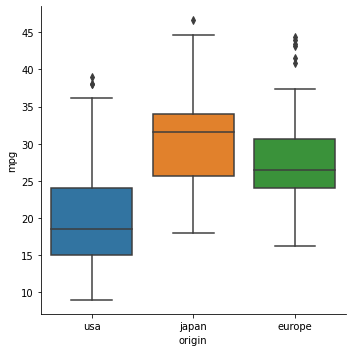

In [4]:
sns.catplot(data=cars,x="origin",y="mpg",kind="box");

Each colored box shows the interquartile range, with the interior horizontal line showing the median. The "whiskers" and dots are explained in a later section. A related visualization is a **violin plot**.

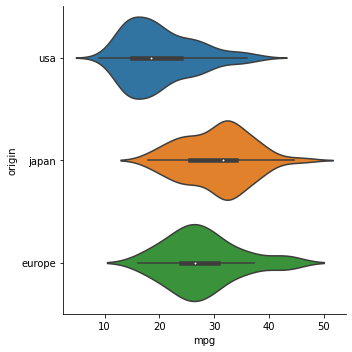

In [5]:
sns.catplot(data=cars,x="mpg",y="origin",kind="violin");

In a violin plot, the inner lines show the same information as the box plot, with the thick part showing the IQR, while the sides of the "violins" are KDE estimates of the continuous distributions.

<div style="max-width:608px"><div style="position:relative;padding-bottom:66.118421052632%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_kqyy86qx&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_mp2d99cc" width="608" height="402" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>